# **Project Name**    - PaisaBazaar

##### **Project Type**    - Classification

# **Project Summary -**

This dataset provides a comprehensive view of customer profiles, encompassing demographic details, financial histories, and payment patterns that play a crucial role in evaluating credit risk. The goal is to clean and analyze this data to identify key features suitable for training Machine Learning and Deep Learning Algorithms.

 - Dataset: Credit Score Dataset
 - Content: Customer demographic, financial, and credit history data.
 - Number of Rows: 96696
 - Number of Columns: 28

# **GitHub Link -**

# **Problem Statement**

Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [9]:
#load dataset
df = pd.read_csv('dataset-2.csv')

In [10]:
# Read data
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [11]:
# No.of rows & columns
df.shape

(100000, 28)

In [12]:
# Read data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [13]:
#duplicate values
df.duplicated().sum()

0

In [14]:
# Missing values
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [15]:
# Check data column names
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [16]:
#dataset describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5634.000000,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,303.645417,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368820e+00,2.593314e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


In [17]:
#check unique values for each variable
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

# Data Wrangling

In [19]:
# Drop unnecessary columns
drop_columns = ['ID', 'Customer_ID', 'Name', 'SSN']
df.drop(columns = drop_columns, inplace = True)

#convert data types
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype('int64')
df['Age'] = df['Age'].astype('int64')
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype('int64')

#round numerical values
df = df.round(2)

# Feature Engineering

In [21]:
#1. Debt to income ratio
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']

#2. Credit card Utilization score
df['Credit_Card_Utilization_Score'] = df['Credit_Utilization_Ratio'] * df['Num_Credit_Card']

#3. Credit Mix score
credit_mix_mapping = {'Bad': 0, 'Standard': 1, 'Good': 2}
df['Credit_Mix_Score'] = df['Credit_Mix'].map(credit_mix_mapping)


#4. Payment Delay Score
df['Payment_Delay_Score'] = df['Num_of_Delayed_Payment'] * df['Delay_from_due_date']

# Data Visualization

### Univariate Analysis

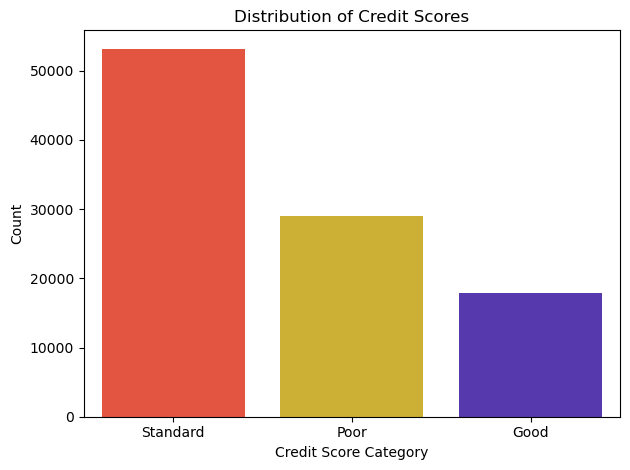

In [24]:
#chart 1 - Distribution of credit scores
#create count plot for credit score distribution
sns.countplot(x = df['Credit_Score'], hue = df['Credit_Score'], palette = 'CMRmap', order = df['Credit_Score'].value_counts().index)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

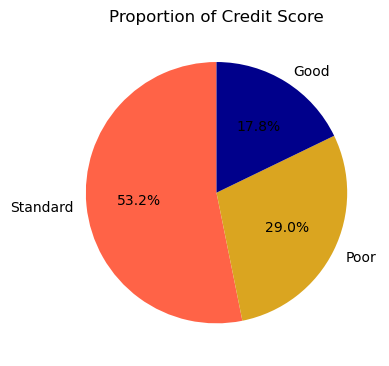

In [25]:
# Chart 2 - Pie chart 
status_counts = df['Credit_Score'].value_counts()
plt.figure(figsize=(4, 4))
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['tomato', 'goldenrod','darkblue'])
plt.title('Proportion of Credit Score')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [26]:
# Chart 3 - Histplot & Barplot 
# Visualize numerical columns
def visualize_numeric_columns(dataframe, num_cols):
    for col in num_cols:
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        
        # Histogram
        sns.histplot(data=dataframe, x=col, bins = 30, kde=True, color = 'darkblue', ax=axs[0])
        axs[0].set_title(f'Distribution of {col}')
        
        # Boxplot
        sns.boxplot(x=dataframe[col], color = 'goldenrod',ax=axs[1])
        axs[1].set_title(f'Boxplot of {col}')
        
        plt.tight_layout()
        plt.show()

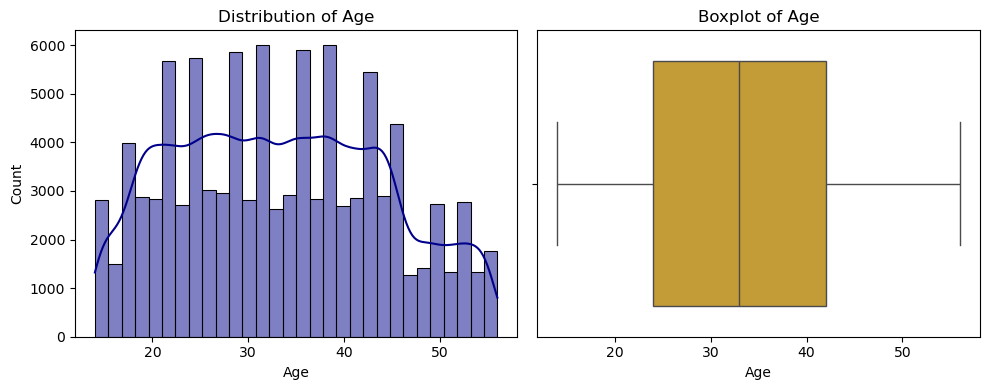

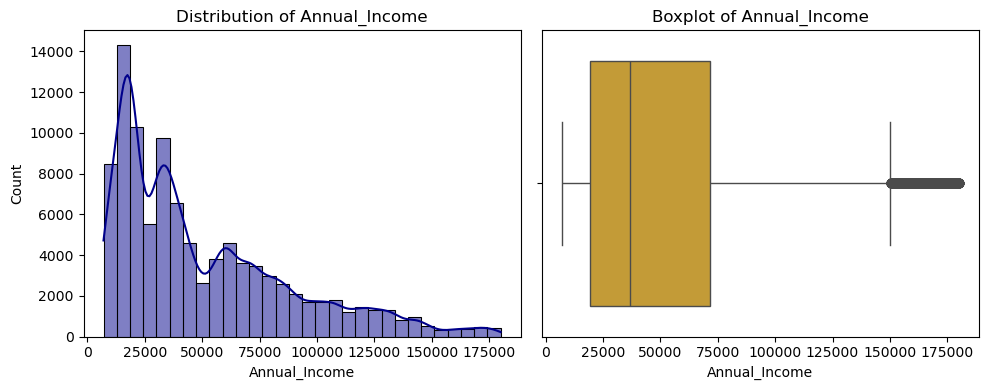

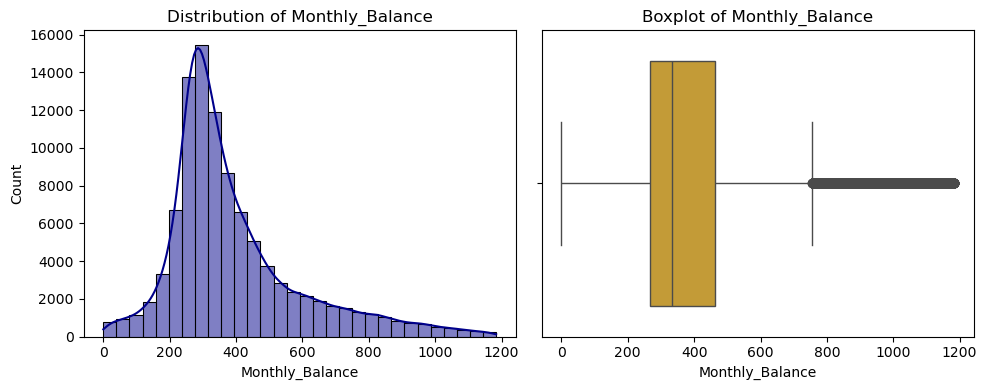

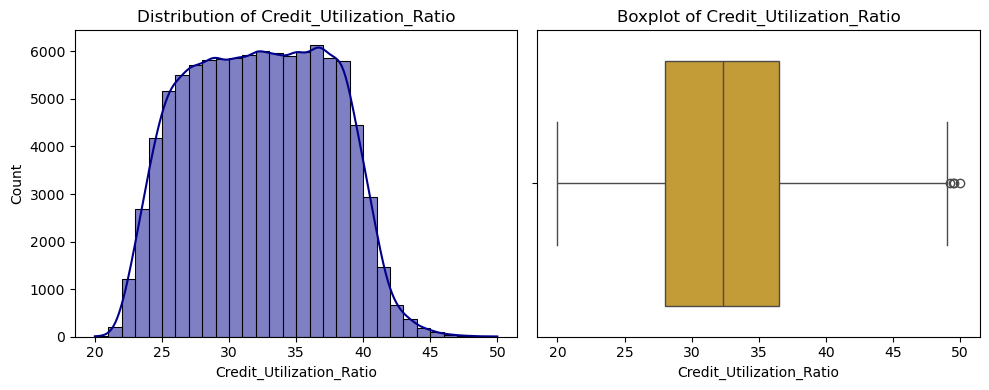

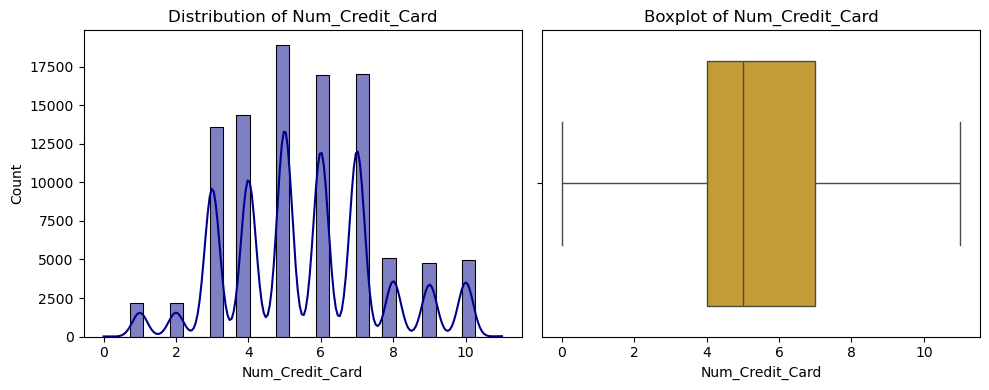

In [27]:
visualize_numeric_columns(df,['Age','Annual_Income','Monthly_Balance','Credit_Utilization_Ratio','Num_Credit_Card'])

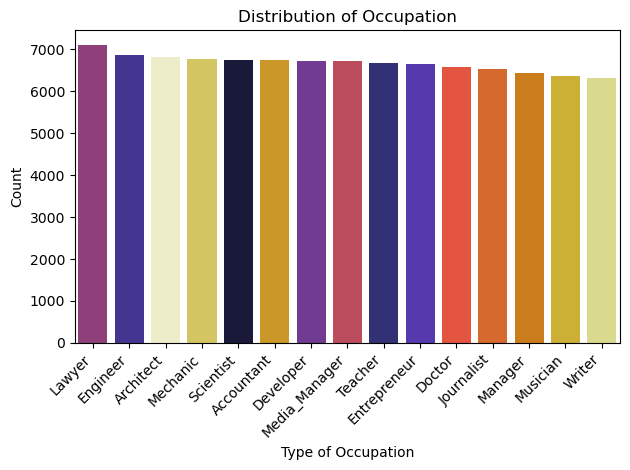

In [28]:
# Chart 4 - count plot for Occupation
sns.countplot(x = df['Occupation'], hue = df['Occupation'], palette = 'CMRmap', order = df['Occupation'].value_counts().index)
plt.title('Distribution of Occupation')
plt.xlabel('Type of Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

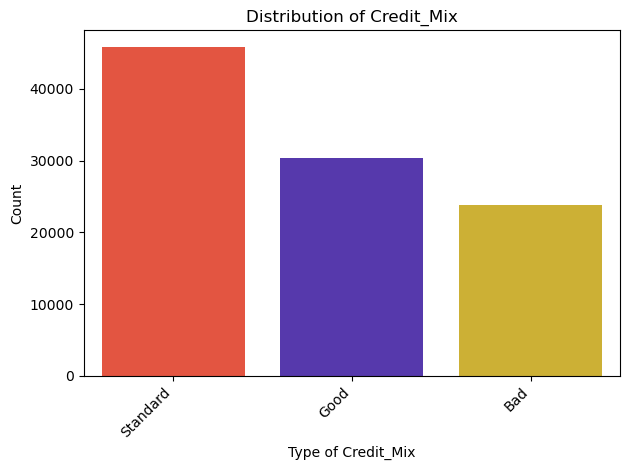

In [29]:
# Chart 5 - count plot for Credit_Mix
sns.countplot(x = df['Credit_Mix'], hue = df['Credit_Mix'], palette = 'CMRmap', order = df['Credit_Mix'].value_counts().index)
plt.title('Distribution of Credit_Mix')
plt.xlabel('Type of Credit_Mix')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bivariate Analysis

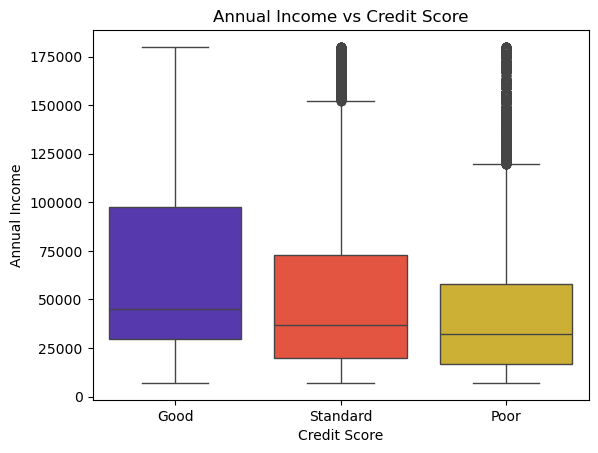

In [31]:
# Chart 6 - annual income vs credit score
#create boxplot for annual income across different credit score categories
sns.boxplot(x= 'Credit_Score', y = "Annual_Income", data = df, palette = 'CMRmap')
plt.title('Annual Income vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.show()

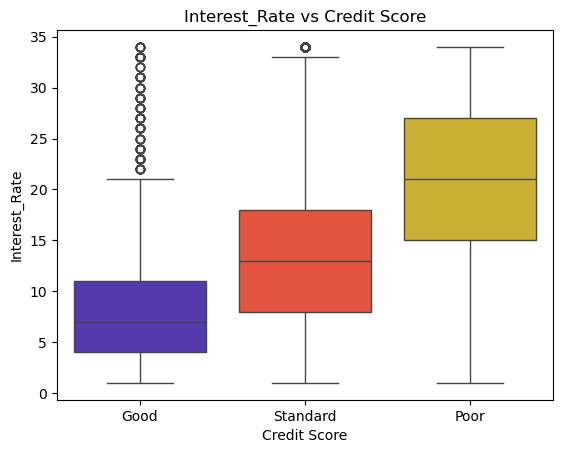

In [32]:
#chart 7 - Interest Rate vs credit score
sns.boxplot(x= 'Credit_Score', y = "Interest_Rate", data = df, palette = 'CMRmap')
plt.title('Interest_Rate vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Interest_Rate')
plt.show()

In [33]:
# Separate by dtype
categorical_cols = df.select_dtypes(include=['object', 'category'])
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

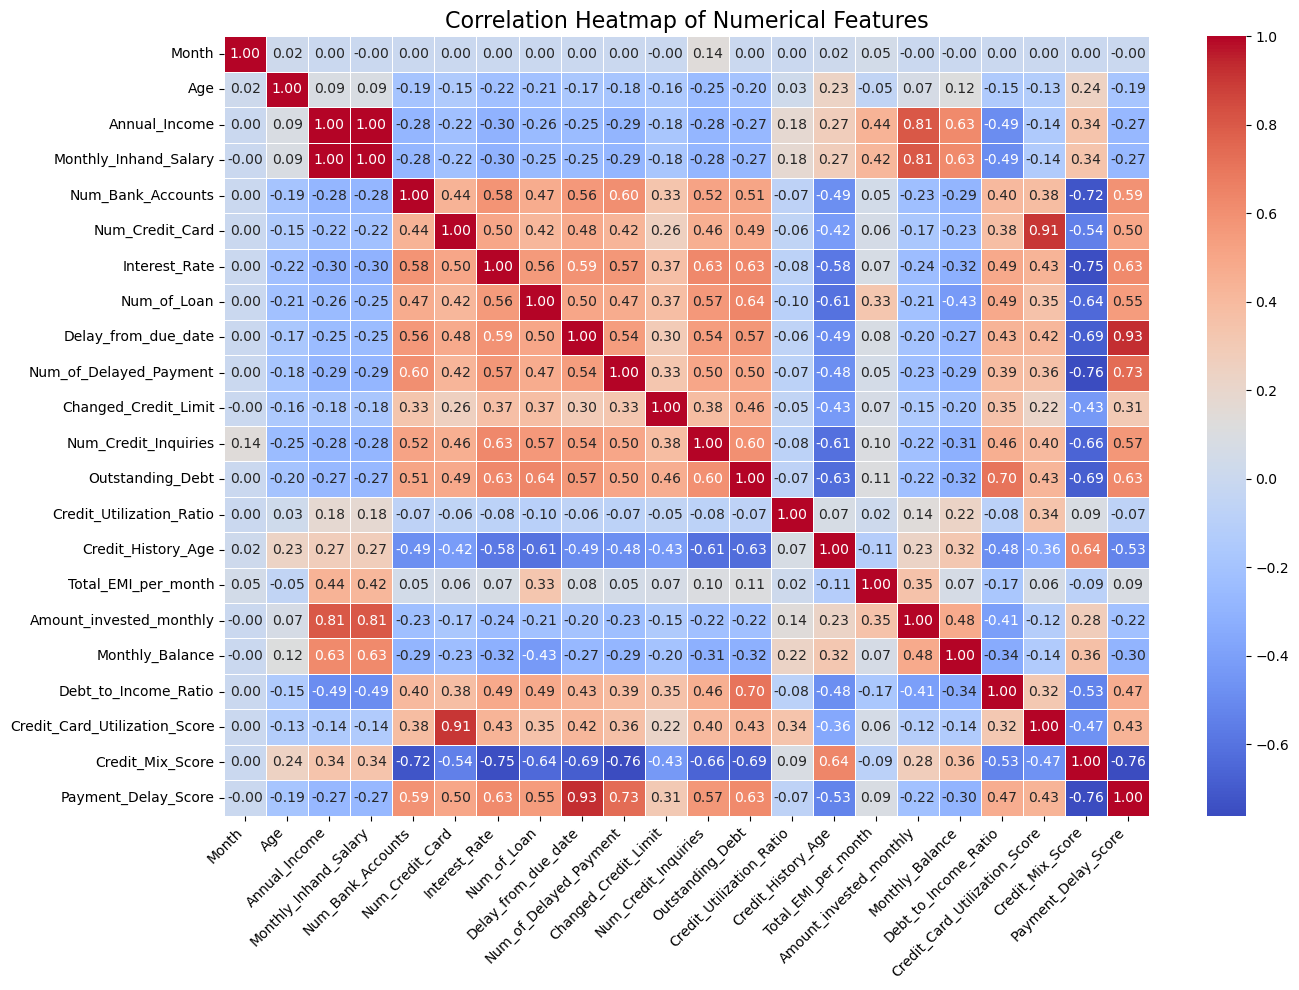

In [34]:
# Chart 8 - Heatmap
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Handle outliers using IQR and Capping Method

In [36]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values at lower and upper bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col]) 
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers have been capped using IQR.")

Outliers have been capped using IQR.


# Feature Selection

### Mutual Information (MI Score)

In [39]:
# Select features and target
X = df.copy()
y = df['Credit_Score']  # Target variable

# Encode categorical variables in X
#categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Calculate Mutual Information Scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create and sort results in a DataFrame
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Display the MI scores
print(mi_scores_df)

                          Feature  MI Score
23                   Credit_Score  1.014324
3                   Annual_Income  0.615171
4           Monthly_Inhand_Salary  0.609989
15               Outstanding_Debt  0.591891
24           Debt_to_Income_Ratio  0.589198
19            Total_EMI_per_month  0.429609
20        Amount_invested_monthly  0.353693
9                    Type_of_Loan  0.340617
26               Credit_Mix_Score  0.194452
14                     Credit_Mix  0.193439
7                   Interest_Rate  0.174117
27            Payment_Delay_Score  0.140161
10            Delay_from_due_date  0.122131
13           Num_Credit_Inquiries  0.120746
6                 Num_Credit_Card  0.110909
18          Payment_of_Min_Amount  0.109214
5               Num_Bank_Accounts  0.105214
12           Changed_Credit_Limit  0.100431
17             Credit_History_Age  0.099144
25  Credit_Card_Utilization_Score  0.093932
11         Num_of_Delayed_Payment  0.090485
8                     Num_of_Loa

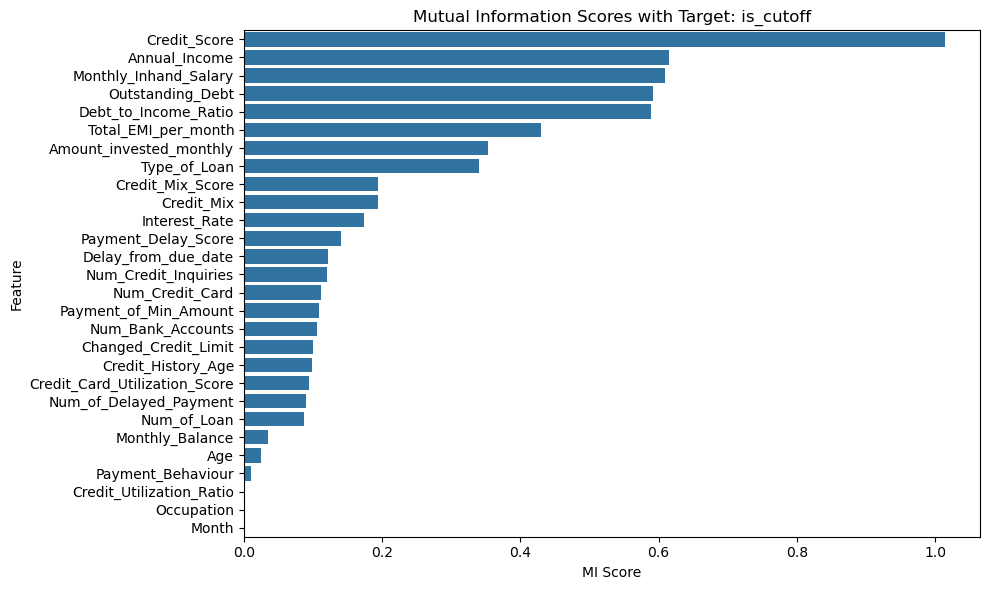

In [40]:
# Visualize MI score
plt.figure(figsize=(10, 6))
sns.barplot(x='MI Score', y='Feature', data=mi_scores_df)
plt.title('Mutual Information Scores with Target: is_cutoff')
plt.tight_layout()
plt.show()

In [41]:
# Feature Selection
# Retain features with MI > 0.05 to reduce dimensionality
selected_features = mi_scores_df[mi_scores_df['MI Score'] > 0.05]['Feature'].tolist()
selected_features

['Credit_Score',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Outstanding_Debt',
 'Debt_to_Income_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Type_of_Loan',
 'Credit_Mix_Score',
 'Credit_Mix',
 'Interest_Rate',
 'Payment_Delay_Score',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Num_Credit_Card',
 'Payment_of_Min_Amount',
 'Num_Bank_Accounts',
 'Changed_Credit_Limit',
 'Credit_History_Age',
 'Credit_Card_Utilization_Score',
 'Num_of_Delayed_Payment',
 'Num_of_Loan']

In [42]:
# Separate Numerical Features
numerical_features = [
 'Debt_to_Income_Ratio',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Outstanding_Debt',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Credit_Mix_Score',
 'Interest_Rate',
 'Payment_Delay_Score',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Num_Credit_Card',
 'Num_Bank_Accounts',
 'Changed_Credit_Limit',
 'Credit_History_Age',
 'Credit_Card_Utilization_Score',
 'Num_of_Delayed_Payment',
 'Num_of_Loan']
X_num = df[numerical_features]

In [43]:
#  Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

In [44]:
# Apply PCA
# Try explaining 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Check number of components retained
print(f"Original features: {X_scaled.shape[1]}")
print(f"PCA components retained: {X_pca.shape[1]}")

Original features: 18
PCA components retained: 11


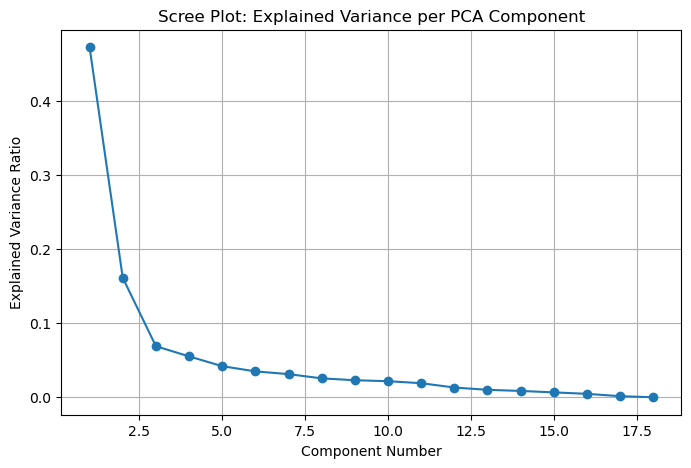

In [45]:
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1), pca_full.explained_variance_ratio_, marker='o')
plt.title('Scree Plot: Explained Variance per PCA Component')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [46]:
#Encode Target Variable
le = LabelEncoder()
y_encoded = le.fit_transform(df['Credit_Score'])  # Maps: Good=0, Fair=1, Poor=2 (example)

In [47]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


# Model 1 : Logistic Regression

In [49]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

Logistic Regression Report:
              precision    recall  f1-score   support

        Good       0.55      0.45      0.50      3566
        Poor       0.67      0.52      0.58      5799
    Standard       0.65      0.77      0.71     10635

    accuracy                           0.64     20000
   macro avg       0.63      0.58      0.60     20000
weighted avg       0.64      0.64      0.63     20000



# Model 2 :  Random Forest Classifier with Hyperparameter Tunning

In [51]:
# GridSearch for RandomForestClassifier
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Random Forest CV Score:", grid_rf.best_score_)

# Evaluate on test set
y_pred_rf = grid_rf.predict(X_test)
print("Random Forest Test Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Save best estimator for Random Forest model
best_RandomForest = grid_rf.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest CV Score: 0.775225
Random Forest Test Report:
              precision    recall  f1-score   support

        Good       0.75      0.69      0.72      3566
        Poor       0.78      0.78      0.78      5799
    Standard       0.79      0.81      0.80     10635

    accuracy                           0.78     20000
   macro avg       0.77      0.76      0.77     20000
weighted avg       0.78      0.78      0.78     20000



# Model 3 : XGBoost with Hyperparameter Tunning

In [53]:
# GridSearch for XGBClassifier
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
grid_xgb = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)

print("Best XGBoost Params:", grid_xgb.best_params_)
print("Best XGBoost CV Score:", grid_xgb.best_score_)

# Evaluate on test set
y_pred_xgb = grid_xgb.predict(X_test)
print("XGBoost Test Report:")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best XGBoost Params: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Best XGBoost CV Score: 0.767525
XGBoost Test Report:
              precision    recall  f1-score   support

        Good       0.74      0.68      0.71      3566
        Poor       0.78      0.77      0.78      5799
    Standard       0.78      0.81      0.80     10635

    accuracy                           0.78     20000
   macro avg       0.77      0.75      0.76     20000
weighted avg       0.77      0.78      0.77     20000



In [54]:
# Compare Final Accuracies
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

Logistic Regression Accuracy: 0.6415
Random Forest Accuracy: 0.78135
XGBoost Accuracy: 0.7752


# Productionization

In [57]:
import pickle
# Save the best Lasso model to a pickle file
with open("RandomForest_best_model.pkl", "wb") as f:
    pickle.dump(best_RandomForest, f)

print("Best model successfully saved to 'RandomForest_best_model.pkl'")

Best model successfully saved to 'RandomForest_best_model.pkl'
